# Tarea 3 
## María José Liberona Tobar




In [1]:
#Tarea 3

#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time
from sklearn.model_selection import train_test_split, PredefinedSplit
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from scipy.io import arff




#Importar archivo 
#Se debe subir el documento diabetes.arff
from google.colab import files
uploaded = files.upload()

Saving diabetes.arff to diabetes.arff


In [2]:
#b) Leer el documento 
data=arff.loadarff('diabetes.arff')
p_data=pd.DataFrame(data[0])
columns=list(p_data.columns)

# Reemplazo de las clases por 1 o 0
p_data.loc[p_data['class']==b'tested_positive','class']=1  #Clase positiva
p_data.loc[p_data['class']==b'tested_negative','class']=0  #Clase negativa

p_data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [3]:
# División en subconjuntos de entrenamiento, validación y prueba. 

d_train, vp=train_test_split(p_data,train_size=0.6,test_size=0.4,shuffle=True)
d_val, d_test=train_test_split(vp,train_size=0.5,test_size=0.5,shuffle=True)

data_train=d_train.reset_index(drop=True)
data_val=d_val.reset_index(drop=True)
data_test=d_test.reset_index(drop=True)



In [4]:
# c) Preprocesar las características usando un StandardScaler
#Entrenamiento de StandScaler a partir de los datos de entrenamiento
scaler = StandardScaler()

print(scaler.fit(data_train.iloc[:,:8])) #Calcula la media y desviación estándar 

#Normaliza las muestras 
train=scaler.transform(data_train.iloc[:,:8])
#print(train)
test=scaler.transform(data_test.iloc[:,:8])
#print(test)
val=scaler.transform(data_val.iloc[:,:8])
#print(val)

#Convierte las clases a un array
class_train=np.array(data_train['class'], dtype='int64')
class_val=np.array(data_val['class'], dtype='int64')
class_test=np.array(data_test['class'],dtype='int64')


StandardScaler(copy=True, with_mean=True, with_std=True)


In [5]:
# d) Realizar una clasificación usando un clasificador svm lineal 

#Antes de crear el clasificador se emplea la función PredefinedSplit() 
indices=np.zeros(data_train.shape[0]+data_val.shape[0])
for i in range(data_train.shape[0]):
  indices[i]=-1
train_val=np.concatenate([train,val])
class_train_val=np.concatenate([class_train,class_val])
p=PredefinedSplit(indices)

#Se crea el estimador directamente desde la función GridSearchCV()

#Hora inicial en segundos
time0=time.time()

#Define el mejor valor de los parámetros
model=GridSearchCV(estimator=svm.SVC(), param_grid={'C':[0.0001, 0.001,0.1],'kernel':['linear']}, cv=p)
#Entrena el modelo lineal 
model.fit(train_val, class_train_val)
#Muestra el resultado de los mejores parámetros
print(model.best_estimator_)
print('El best score del clasificador svm es: '+str(model.best_score_))

#Hora final en segundos
time1=time.time()
#Tiempo que se demora el entrenamiento
time_train=time1-time0
print('El tiempo de entrenamiento es: '+str(time_train))

#Se guardan los mejores parámetros y reentrena el modelo lineal
model_lineal=GridSearchCV(estimator=svm.SVC(), param_grid={'C':[model.best_estimator_.C],'kernel':['linear']})
model_lineal.fit(train, class_train)
print(model_lineal.best_estimator_)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
El best score del clasificador svm es: 0.7857142857142857
El tiempo de entrenamiento es: 0.031992197036743164
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


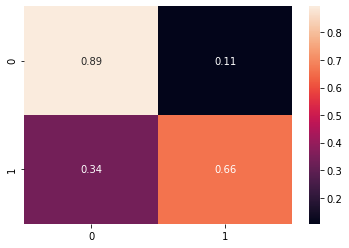

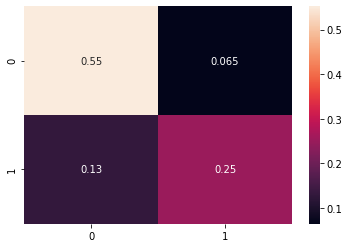

El accuracy mediante la métrica es: 0.8051948051948052
Suma de la diagonal para la matriz de confusión (all): 0.8051948051948052
Suma de la diagonal para la matriz de confusión (true): 1.5557537912578057
Promedio de la diagonal para la matriz de confusión (true): 0.7778768956289028


In [6]:
# e) Generar matriz de confusión normalizada 

#Predicción usando el modelo_lineal
pred_val=model.predict(val) 

#Matriz de confusión normalizada True
mc_val_t=confusion_matrix(class_val,pred_val, labels=[0,1], normalize='true')
#print(mc_val_t)
sb.heatmap(mc_val_t, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_a=confusion_matrix(class_val,pred_val, labels=[0,1], normalize='all')
#print(mc_val_a)
sb.heatmap(mc_val_a, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val=accuracy_score(class_val,pred_val, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val))
prom_diagonal=mc_val_a.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_t=mc_val_t.diagonal().sum()
prom_diagonal_t2=prom_diagonal_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_t2))




In [7]:
# f) Realizar selección de características usando SelectFromModel

#Entrena y encuentra las mejores características
selector = SelectFromModel(estimator=model.best_estimator_).fit(train, class_train)

#Muestra si las características fueron elegidas
best_c=selector.get_support()
#print(best_c)

#Muestra las características elegidas
elegidas=list()
for i in range(len(columns)-1):
  if best_c[i]==True:
    elegidas.append(columns[i])
    #print(columns[i])
print('Las características elegidas fueron: '+str(elegidas))



Las características elegidas fueron: ['preg', 'plas', 'mass']


In [8]:
#g) Entrenar un segundo clasificador con el conjunto de características reducido


#Primero se reducen los conjuntos sólo a las características seleccionadas

#Reduce el número de características 
r_train=selector.transform(train)
r_val=selector.transform(val)
r_test=selector.transform(test)

#Entrenamiento de un segundo clasificador 
#Se concatenan los conjuntos entrenamiento y val con características reducidas
r_train_val=np.concatenate([r_train,r_val])

#Hora inicial en segundos
time0_2=time.time()

# Las clases e índices siguen siendo los mismss que para el caso anterior
# Luego, se entrena con el nuevo conjunto concatenado de train y val
model_2=GridSearchCV(estimator=svm.SVC(), param_grid={'C':[0.0001, 0.001,0.1],'kernel':['linear']}, cv=p)
#Entrena el modelo
model_2.fit(r_train_val, class_train_val)
print(model_2.best_estimator_)
print('El best score del clasificador svm es: '+str(model_2.best_score_))

#Hora final en segundos
time1_2=time.time()
#Tiempo que se demora el entrenamiento
time_train_2=time1_2-time0_2
print('El tiempo de entrenamiento es: '+str(time_train_2))

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
El best score del clasificador svm es: 0.7662337662337663
El tiempo de entrenamiento es: 0.019629478454589844


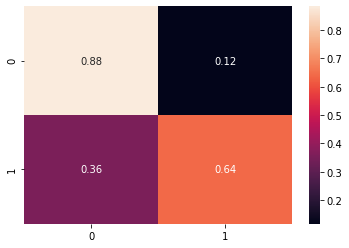

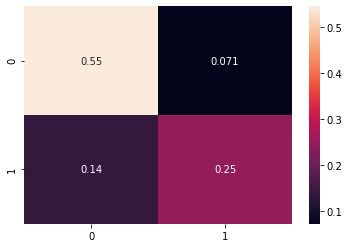

El accuracy mediante la métrica es: 0.7922077922077922
Suma de la diagonal para la matriz de confusión (all): 0.7922077922077921
Suma de la diagonal para la matriz de confusión (true): 1.5282783229259589
Promedio de la diagonal para la matriz de confusión (true): 0.7641391614629794


In [9]:
# h) Generar una matriz de confusión normalizada para el clasificador 
# características reducidas

#Predicción usando el modelo_lineal
pred_val_2=model_2.predict(r_val) 

#Matriz de confusión normalizada True
mc_val_t2=confusion_matrix(class_val,pred_val_2, labels=[0,1], normalize='true')
#print(mc_val_t2)
sb.heatmap(mc_val_t2, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_a2=confusion_matrix(class_val,pred_val_2, labels=[0,1], normalize='all')
#print(mc_val_a2)
sb.heatmap(mc_val_a2, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_2=accuracy_score(class_val,pred_val_2, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_2))
prom_diagonal2_a=mc_val_a2.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal2_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal2_t=mc_val_t2.diagonal().sum()
prom_diagonal2_t2=prom_diagonal2_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal2_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal2_t2))


Las características elegidas fueron: ['preg', 'plas', 'mass', 'age']
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
El best score del clasificador svm es: 0.7662337662337663
El tiempo de entrenamiento es: 0.022139787673950195


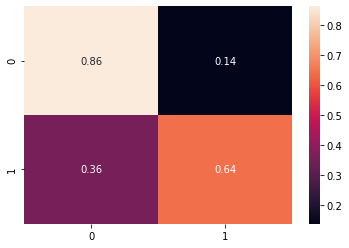

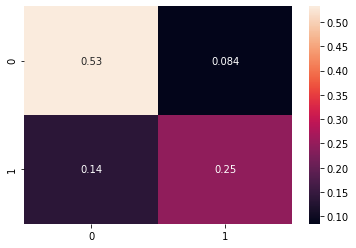

El accuracy mediante la métrica es: 0.7792207792207793
Suma de la diagonal para la matriz de confusión (all): 0.7792207792207791
Suma de la diagonal para la matriz de confusión (true): 1.5072256913470117
Promedio de la diagonal para la matriz de confusión (true): 0.7536128456735058


In [10]:
#i) Repetir los pasos g) y h) usando un clasificador svm lineal, 
# eligiendo las 4 mejores características encontradas por SelectKBest

# Entrena y encuentra las mejores características 
selectorK=SelectKBest(k=4).fit(train,class_train)
#Muestra si las caracteristicas fueron elegidas
best_k=selectorK.get_support()
#print(best_k)
#Muestra las características elegidas
elegidas3=list()
for i in range(len(columns)-1):
  if best_k[i]==True:
    #print(columns[i])
    elegidas3.append(columns[i])
print('Las características elegidas fueron: '+str(elegidas3))

#Primero se reducen los conjuntos sólo a las características seleccionadas

#Reduce el número de características 
r_train_3=selectorK.transform(train)
r_val_3=selectorK.transform(val)
r_test_3=selectorK.transform(test)

#Entrenamiento de un clasificador svm lineal
#Se concatenan los conjuntos entrenamiento y val con características reducidas
r_train_val_3=np.concatenate([r_train_3,r_val_3])

#Hora inicial en segundos
time0_3=time.time()

# Las clases e índices siguen siendo los mismos que para el caso anterior
# Luego, se entrena con el nuevo conjunto concatenado de train y val
model_3=GridSearchCV(estimator=svm.SVC(), param_grid={'C':[0.0001, 0.001,0.1],'kernel':['linear']}, cv=p)
#Entrena el modelo
model_3.fit(r_train_val_3, class_train_val)
print(model_3.best_estimator_)
print('El best score del clasificador svm es: '+str(model_3.best_score_))

#Hora final en segundos
time1_3=time.time()
#Tiempo que se demora el entrenamiento
time_train_3=time1_3-time0_3
print('El tiempo de entrenamiento es: '+str(time_train_3))

#Predicción usando el modelo_lineal
pred_val_3=model_3.predict(r_val_3) 

#Matriz de confusión normalizada True
mc_val_t3=confusion_matrix(class_val,pred_val_3, labels=[0,1], normalize='true')
#print(mc_val_t3)
sb.heatmap(mc_val_t3, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_a3=confusion_matrix(class_val,pred_val_3, labels=[0,1], normalize='all')
#print(mc_val_a3)
sb.heatmap(mc_val_a3, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_3=accuracy_score(class_val,pred_val_3, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_3))
prom_diagonal3_a=mc_val_a3.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal3_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal3_t=mc_val_t3.diagonal().sum()
prom_diagonal3_t2=prom_diagonal3_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal3_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal3_t2))



Las características elegidas fueron: ['preg', 'plas']
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
El best score del clasificador svm es: 0.7597402597402597
El tiempo de entrenamiento es: 0.021710634231567383


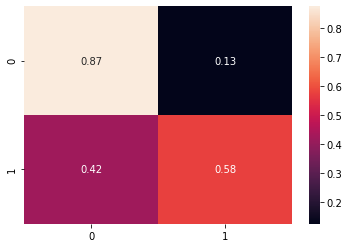

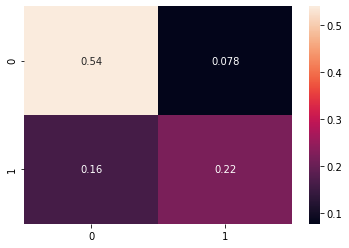

El accuracy mediante la métrica es: 0.7597402597402597
Suma de la diagonal para la matriz de confusión (all): 0.7597402597402597
Suma de la diagonal para la matriz de confusión (true): 1.4499553969669938
Promedio de la diagonal para la matriz de confusión (true): 0.7249776984834969


In [11]:
#j) Repetir los pasos g) y h) usando un clasificador svm lineal, 
# eligiendo las 2 mejores características encontradas por SelectKBest

# Entrena y encuentra las mejores características 
selectorK_2=SelectKBest(k=2).fit(train,class_train)
#Muestra si las caracteristicas fueron elegidas
best_k_2=selectorK_2.get_support()
#print(best_k_2)

#Muestra las características elegidas
elegidask2=list()
for i in range(len(columns)-1):
  if best_k_2[i]==True:
    #print(columns[i])
    elegidask2.append(columns[i])
print('Las características elegidas fueron: '+str(elegidask2))

#Primero se reducen los conjuntos sólo a las características seleccionadas

#Reduce el número de características 
r_train_4=selectorK_2.transform(train)
r_val_4=selectorK_2.transform(val)
r_test_4=selectorK_2.transform(test)

#Entrenamiento de un clasificador svm lineal
#Se concatenan los conjuntos entrenamiento y val con características reducidas
r_train_val_4=np.concatenate([r_train_4,r_val_4])

#Hora inicial en segundos
time0_4=time.time()

# Las clases e índices siguen siendo los mismos que para el caso anterior
# Luego, se entrena con el nuevo conjunto concatenado de train y val
model_4=GridSearchCV(estimator=svm.SVC(), param_grid={'C':[0.0001, 0.001,0.1],'kernel':['linear']}, cv=p)
#Entrena el modelo
model_4.fit(r_train_val_4, class_train_val)
print(model_4.best_estimator_)
print('El best score del clasificador svm es: '+str(model_4.best_score_))

#Hora final en segundos
time1_4=time.time()
#Tiempo que se demora el entrenamiento
time_train_4=time1_4-time0_4
print('El tiempo de entrenamiento es: '+str(time_train_4))

#Predicción usando el modelo_lineal
pred_val_4=model_4.predict(r_val_4) 

#Matriz de confusión normalizada True
mc_val_t4=confusion_matrix(class_val,pred_val_4, labels=[0,1], normalize='true')
#print(mc_val_t4)
sb.heatmap(mc_val_t4, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_a4=confusion_matrix(class_val,pred_val_4, labels=[0,1], normalize='all')
#print(mc_val_a4)
sb.heatmap(mc_val_a4, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_4=accuracy_score(class_val,pred_val_4, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_4))
prom_diagonal4_a=mc_val_a4.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal4_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal4_t=mc_val_t4.diagonal().sum()
prom_diagonal4_t2=prom_diagonal4_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal4_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal4_t2))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
El best score del clasificador RandomForest es: 0.7727272727272727
El tiempo de entrenamiento es: 1.630774736404419


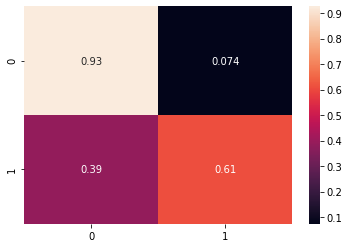

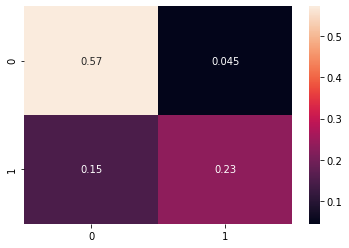

El accuracy mediante la métrica es: 0.8051948051948052
Suma de la diagonal para la matriz de confusión (all): 0.8051948051948051
Suma de la diagonal para la matriz de confusión (true): 1.5364852809991079
Promedio de la diagonal para la matriz de confusión (true): 0.7682426404995539


In [12]:
#k) Repetir el paso d) y e) usando un clasificador RandomForest, 
# con una profundidad de 3 y usando una grillasobre el hiperparámetro n_estimators

#Hora inicial en segundos
time0_random=time.time()

#Se crea el estimador directamente desde la función GridSearchCV()
#Define el mejor valor de los parámetros
model_random=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[3],'n_estimators':[50,100,150,200,250]}, cv=p)
#Entrena el modelo RandomForestClassifier()
model_random.fit(train_val, class_train_val)
#Muestra el resultado de los mejores parámetros
print(model_random.best_estimator_)
print('El best score del clasificador RandomForest es: '+str(model_random.best_score_))

#Hora final en segundos
time1_random=time.time()
#Tiempo que se demora el entrenamiento
time_train_random=time1_random-time0_random
print('El tiempo de entrenamiento es: '+str(time_train_random))

#Predicción usando el RandomForest
pred_val_random=model_random.predict(val) 

#Matriz de confusión normalizada True
mc_val_t_random=confusion_matrix(class_val,pred_val_random, labels=[0,1], normalize='true')
#print(mc_val_t_random)
sb.heatmap(mc_val_t_random, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_a_random=confusion_matrix(class_val,pred_val_random, labels=[0,1], normalize='all')
#print(mc_val_a_random)
sb.heatmap(mc_val_a_random, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_random=accuracy_score(class_val,pred_val_random, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_random))
prom_diagonal_random_a=mc_val_a_random.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal_random_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_random_t=mc_val_t_random.diagonal().sum()
prom_diagonal_random_t2=prom_diagonal_random_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random_t2))




Las características elegidas fueron: ['plas', 'mass', 'age']
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
El best score del clasificador RandomForest es: 0.7922077922077922
El tiempo de entrenamiento es: 1.6003315448760986


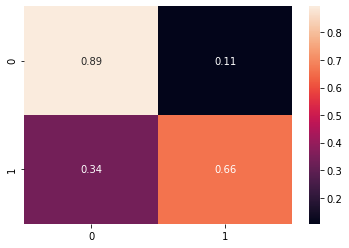

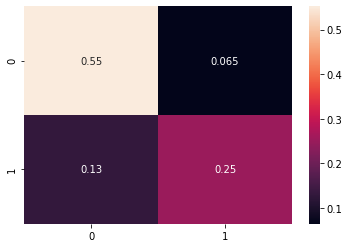

El accuracy mediante la métrica es: 0.8051948051948052
Suma de la diagonal para la matriz de confusión (all): 0.8051948051948052
Suma de la diagonal para la matriz de confusión (true): 1.5557537912578057
Promedio de la diagonal para la matriz de confusión (true): 0.7778768956289028


In [13]:
#l) Repetir los pasos g) y h) usando un clasificador RandomForest, usando
# el selector de características SelectFromModel

#Entrena y encuentra las mejores características
selector_random = SelectFromModel(estimator=model_random.best_estimator_).fit(train, class_train)
#Muestra si las características fueron elegidas
best_random=selector_random.get_support()
#print(best_random)
#Muestra las características elegidas
elegidasr=list()
for i in range(len(columns)-1):
  if best_random[i]==True:
    #print(columns[i])
    elegidasr.append(columns[i])
print('Las características elegidas fueron: '+str(elegidasr))

#Primero se reducen los conjuntos sólo a las características seleccionadas

#Reduce el número de características 
random_train=selector_random.transform(train)
random_val=selector_random.transform(val)
random_test=selector_random.transform(test)

#Entrenamiento de un segundo clasificador 
#Se concatenan los conjuntos entrenamiento y val con características reducidas
random_train_val=np.concatenate([random_train,random_val])

#Hora inicial en segundos
time0_r=time.time()

# Las clases e índices siguen siendo los mismss que para el caso anterior
# Luego, se entrena con el nuevo conjunto concatenado de train y val
model_random2=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[3],'n_estimators':[50,100,150,200,250]}, cv=p)
#Entrena el modelo
model_random2.fit(random_train_val, class_train_val)
print(model_random2.best_estimator_)
print('El best score del clasificador RandomForest es: '+str(model_random2.best_score_))

#Hora final en segundos
time1_r=time.time()
#Tiempo que se demora el entrenamiento
time_train_r=time1_r-time0_r
print('El tiempo de entrenamiento es: '+str(time_train_r))

#Predicción usando el modelo_lineal
pred_val_random2=model_random2.predict(random_val) 

#Matriz de confusión normalizada True
mc_val_t_random2=confusion_matrix(class_val,pred_val_random2, labels=[0,1], normalize='true')
#print(mc_val_t_random2)
sb.heatmap(mc_val_t_random2, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_a_random2=confusion_matrix(class_val,pred_val_random2, labels=[0,1], normalize='all')
#print(mc_val_a_random2)
sb.heatmap(mc_val_a_random2, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_random2=accuracy_score(class_val,pred_val_random2, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_random2))
prom_diagonal_random2_a=mc_val_a_random2.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal_random2_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_random2_t=mc_val_t_random2.diagonal().sum()
prom_diagonal_random2_t2=prom_diagonal_random2_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random2_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random2_t2))



Las características elegidas fueron: ['preg', 'plas', 'mass', 'age']
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
El best score del clasificador RandomForest es: 0.7922077922077922
El tiempo de entrenamiento es: 1.3443107604980469


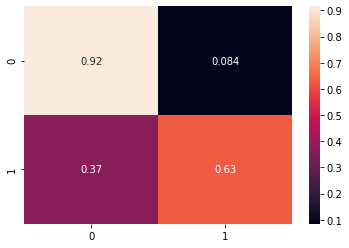

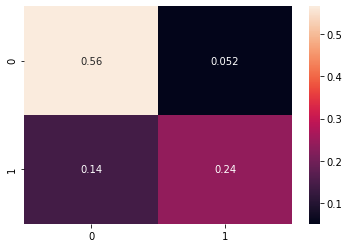

El accuracy mediante la métrica es: 0.8051948051948052
Suma de la diagonal para la matriz de confusión (all): 0.8051948051948052
Suma de la diagonal para la matriz de confusión (true): 1.542908117752007
Promedio de la diagonal para la matriz de confusión (true): 0.7714540588760035


In [14]:
# m) Repetir los pasos g) y h) usando un clasificador RandomForest, eligiendo
# las 4 mejores características encontradas por SelectKBest

# Entrena y encuentra las mejores características 
selectorK_random=SelectKBest(k=4).fit(train,class_train)
#Muestra si las caracteristicas fueron elegidas
best_krandom=selectorK_random.get_support()
#print(best_krandom)
#Muestra las características elegidas
elegidasr2=list()
for i in range(len(columns)-1):
  if best_krandom[i]==True:
    #print(columns[i])
    elegidasr2.append(columns[i])
print('Las características elegidas fueron: '+str(elegidasr2))

#Primero se reducen los conjuntos sólo a las características seleccionadas

#Reduce el número de características 
random_train3=selectorK_random.transform(train)
random_val3=selectorK_random.transform(val)
random_test3=selectorK_random.transform(test)

#Entrenamiento de un clasificador RandomForest
#Se concatenan los conjuntos entrenamiento y val con características reducidas
random_train_val3=np.concatenate([random_train3,random_val3])

#Hora inicial en segundos
time0_r3=time.time()

# Las clases e índices siguen siendo los mismos que para el caso anterior
# Luego, se entrena con el nuevo conjunto concatenado de train y val
model_random3=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[3],'n_estimators':[50,100,150,200,250]}, cv=p)
#Entrena el modelo
model_random3.fit(random_train_val3, class_train_val)
print(model_random3.best_estimator_)
print('El best score del clasificador RandomForest es: '+str(model_random3.best_score_))

#Hora final en segundos
time1_r3=time.time()
#Tiempo que se demora el entrenamiento
time_train_r3=time1_r3-time0_r3
print('El tiempo de entrenamiento es: '+str(time_train_r3))

#Predicción usando el modelo RandomForest
pred_val_random3=model_random3.predict(random_val3) 

#Matriz de confusión normalizada True
mc_val_trandom3=confusion_matrix(class_val,pred_val_random3, labels=[0,1], normalize='true')
#print(mc_val_trandom3)
sb.heatmap(mc_val_trandom3, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_arandom3=confusion_matrix(class_val,pred_val_random3, labels=[0,1], normalize='all')
#print(mc_val_ar3)
sb.heatmap(mc_val_arandom3, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_random3=accuracy_score(class_val,pred_val_random3, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_random3))
prom_diagonal_random3_a=mc_val_arandom3.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal_random3_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_random3_t=mc_val_trandom3.diagonal().sum()
prom_diagonal_random3_t2=prom_diagonal_random3_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random3_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random3_t2))



Las características elegidas fueron: ['preg', 'plas']
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
El best score del clasificador svm es: 0.7597402597402597
El tiempo de entrenamiento es: 1.2389092445373535


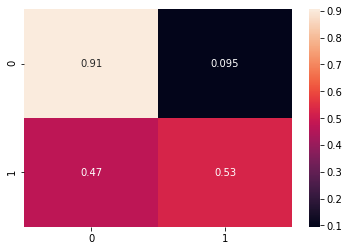

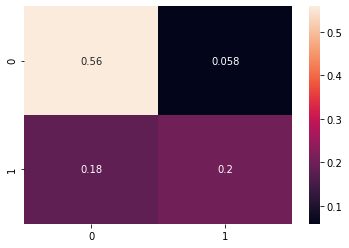

El accuracy mediante la métrica es: 0.7597402597402597
Suma de la diagonal para la matriz de confusión (all): 0.7597402597402597
Suma de la diagonal para la matriz de confusión (true): 1.4306868867082962
Promedio de la diagonal para la matriz de confusión (true): 0.7153434433541481


In [15]:
# n) Repetir los pasos g) y h) usando un clasificador RandomForest, eligiendo
# las 2 mejores características encontradas por SelectKBest

# Entrena y encuentra las mejores características 
selectorK_random2=SelectKBest(k=2).fit(train,class_train)
#Muestra si las caracteristicas fueron elegidas
best_krandom2=selectorK_random2.get_support()
#print(best_krandom2)
#Muestra las características elegidas
elegidasrk2=list()
for i in range(len(columns)-1):
  if best_krandom2[i]==True:
    #print(columns[i])
    elegidasrk2.append(columns[i])
print('Las características elegidas fueron: '+str(elegidasrk2))

#Primero se reducen los conjuntos sólo a las características seleccionadas

#Reduce el número de características 
random_train4=selectorK_random2.transform(train)
random_val4=selectorK_random2.transform(val)
random_test4=selectorK_random2.transform(test)

#Entrenamiento de un clasificador RandomForest
#Se concatenan los conjuntos entrenamiento y val con características reducidas
random_train_val4=np.concatenate([random_train4,random_val4])

#Hora inicial en segundos
time0_r4=time.time()

# Las clases e índices siguen siendo los mismos que para el caso anterior
# Luego, se entrena con el nuevo conjunto concatenado de train y val
model_random4=GridSearchCV(estimator=RandomForestClassifier(), param_grid={'max_depth':[3],'n_estimators':[50,100,150,200,250]}, cv=p)
#Entrena el modelo
model_random4.fit(random_train_val4, class_train_val)
print(model_random4.best_estimator_)
print('El best score del clasificador svm es: '+str(model_4.best_score_))


#Hora final en segundos
time1_r4=time.time()
#Tiempo que se demora el entrenamiento
time_train_r4=time1_r4-time0_r4
print('El tiempo de entrenamiento es: '+str(time_train_r4))

#Predicción usando el modelo RandomForest
pred_val_random4=model_random4.predict(random_val4) 

#Matriz de confusión normalizada True
mc_val_trandom4=confusion_matrix(class_val,pred_val_random4, labels=[0,1], normalize='true')
#print(mc_val_trandom4)
sb.heatmap(mc_val_trandom4, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_val_arandom4=confusion_matrix(class_val,pred_val_random4, labels=[0,1], normalize='all')
#print(mc_val_arandom4)
sb.heatmap(mc_val_arandom4, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_val_random4=accuracy_score(class_val,pred_val_random4, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_val_random4))
prom_diagonal_random4_a=mc_val_arandom4.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal_random4_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_random4_t=mc_val_trandom4.diagonal().sum()
prom_diagonal_random4_t2=prom_diagonal_random4_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random4_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_random4_t2))


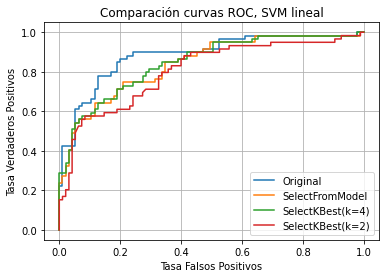

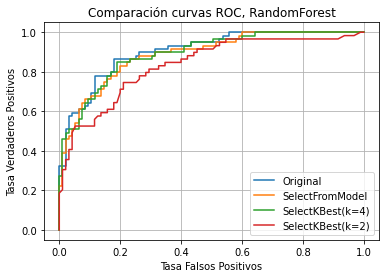

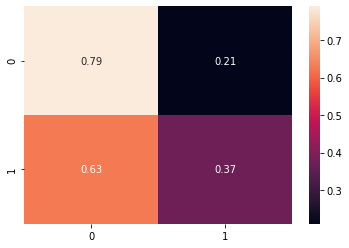

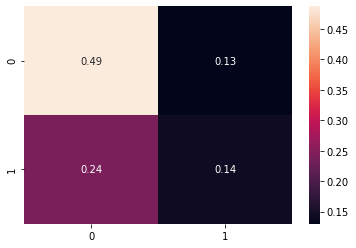

El accuracy mediante la métrica es: 0.6298701298701299
Suma de la diagonal para la matriz de confusión (all): 0.6298701298701299
Suma de la diagonal para la matriz de confusión (true): 1.1623550401427298
Promedio de la diagonal para la matriz de confusión (true): 0.5811775200713649


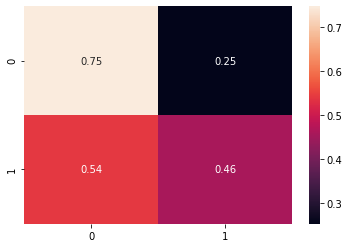

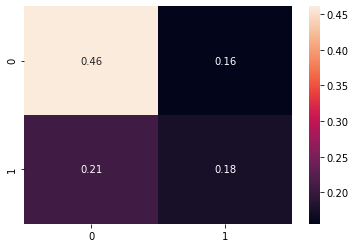

El accuracy mediante la métrica es: 0.6363636363636364
Suma de la diagonal para la matriz de confusión (all): 0.6363636363636364
Suma de la diagonal para la matriz de confusión (true): 1.2049955396966994
Promedio de la diagonal para la matriz de confusión (true): 0.6024977698483497


In [20]:
#o) Evalúe el mejor svm y el mejor random forest encontrados con
# características reducidas sobre el conjunto de prueba, indicando las matrices
# de confusión normalizadas y sus accuracies

#Para determinar el mejor clasificador se usará la métrica curva ROC sobre el conjunto de validación

#Curva ROC SVM Original
decision_svm=model.decision_function(val)
FPR_svm, TPR_svm, thresholds_svm = roc_curve(class_val, decision_svm)

#Curva ROC SVM SelectFromModel
decision_svm_r=model_2.decision_function(r_val)
FPR_svm_r, TPR_svm_r, thresholds_svm_r = roc_curve(class_val, decision_svm_r)

#Curva ROC SVM SelectKBest(k=4)
decision_svm_r3=model_3.decision_function(r_val_3)
FPR_svm_r3, TPR_svm_r3, thresholds_svm_r3 = roc_curve(class_val, decision_svm_r3)

#Curva ROC SVM SelectKBest(k=2)
decision_svm_r4=model_4.decision_function(r_val_4)
FPR_svm_r4, TPR_svm_r4, thresholds_svm_r4 = roc_curve(class_val, decision_svm_r4)

#Gráfico comparativo de las curvas roc

plt.plot(FPR_svm,TPR_svm, label='Original')
plt.plot(FPR_svm_r,TPR_svm_r, label='SelectFromModel')
plt.plot(FPR_svm_r3,TPR_svm_r3, label='SelectKBest(k=4)')
plt.plot(FPR_svm_r4,TPR_svm_r4, label='SelectKBest(k=2)')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Comparación curvas ROC, SVM lineal')
plt.legend()
plt.grid()
plt.show()

#Curva ROC RandomForest Original
decision_rf=model_random.predict_proba(val)
FPR_rf, TPR_rf, thresholds_rf = roc_curve(class_val, decision_rf[:,1])

#Curva ROC SVM SelectFromModel
decision_rf2=model_random2.predict_proba(random_val)
FPR_rf2, TPR_rf2, thresholds_rf2 = roc_curve(class_val, decision_rf2[:,1])

#Curva ROC SVM SelectKBest(k=4)
decision_rf3=model_random3.predict_proba(random_val3)
FPR_rf3, TPR_rf3, thresholds_rf3 = roc_curve(class_val, decision_rf3[:,1])

#Curva ROC SVM SelectKBest(k=2)
decision_rf4=model_random4.predict_proba(random_val4)
FPR_rf4, TPR_rf4, thresholds_rf4 = roc_curve(class_val, decision_rf4[:,1])

#Gráfico comparativo de las curvas roc

plt.plot(FPR_rf,TPR_rf, label='Original')
plt.plot(FPR_rf2,TPR_rf2, label='SelectFromModel')
plt.plot(FPR_rf3,TPR_rf3, label='SelectKBest(k=4)')
plt.plot(FPR_rf4,TPR_rf4, label='SelectKBest(k=2)')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Comparación curvas ROC, RandomForest')
plt.legend()
plt.grid()
plt.show()


#Notemos que para el clasificador svm lineal la mejor opción es aplicarlo a 
# dos caracteristicas, ya que tiene un accuracy mayor y menor tiempo de entrenamiento

#Predicción usando el modelo_lineal (dos caracteristicas)
pred_svm_test=model_2.predict(r_test) 

#Matriz de confusión normalizada True
mc_test_t=confusion_matrix(class_val,pred_svm_test, labels=[0,1], normalize='true')
#print(mc_test_t)
sb.heatmap(mc_test_t, annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_test_a=confusion_matrix(class_val,pred_svm_test, labels=[0,1], normalize='all')
#print(mc_test_a)
sb.heatmap(mc_test_a, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_test=accuracy_score(class_val,pred_svm_test, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_test))
prom_diagonal_test_a=mc_test_a.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal_test_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_test_t=mc_test_t.diagonal().sum()
prom_diagonal_test_t2=prom_diagonal_test_t/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_test_t))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_test_t2))

#Luego, para el clasificador RandomForest se eligió el que trabaja con 3 caracteristicas

#Predicción usando el modelo_lineal (dos caracteristicas)
pred_random_test=model_random2.predict(random_test) 

#Matriz de confusión normalizada True
mc_test_randomt=confusion_matrix(class_val,pred_random_test, labels=[0,1], normalize='true')
#print(mc_test_randomt)
sb.heatmap(mc_test_randomt,annot=True)
plt.show()

#Matriz de confusión normalizada All
mc_test_randoma=confusion_matrix(class_val,pred_random_test, labels=[0,1], normalize='all')
#print(mc_test_randoma)
sb.heatmap(mc_test_randoma, annot=True)
plt.show()

#Métrica Accuracy (promedio diagonales) con normalización 'all'
acc_test_random=accuracy_score(class_val,pred_random_test, normalize=True)
print('El accuracy mediante la métrica es: '+str(acc_test_random))
prom_diagonal_test_random_a=mc_test_randoma.diagonal().sum()
print('Suma de la diagonal para la matriz de confusión (all): '+str(prom_diagonal_test_random_a))

#Métrica Accuracy (promedio diagonales) con normalización 'true'
prom_diagonal_test_randomt=mc_test_randomt.diagonal().sum()
prom_diagonal_test_randomt2=prom_diagonal_test_randomt/2
print('Suma de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_test_randomt))
print('Promedio de la diagonal para la matriz de confusión (true): '+str(prom_diagonal_test_randomt2))




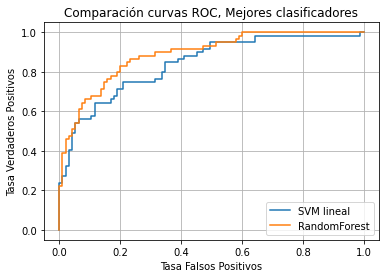

In [21]:
#Comparación mejores clasificadores
plt.plot(FPR_svm_r,TPR_svm_r, label='SVM lineal')
plt.plot(FPR_rf2,TPR_rf2, label='RandomForest')
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Comparación curvas ROC, Mejores clasificadores')
plt.legend()
plt.grid()
plt.show()